In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
def encode_cabin(dataframe, section):
    dataframe.loc[dataframe["Cabin"].str.contains(section), f"is_on_{section}"] = 1
    dataframe.loc[~dataframe["Cabin"].str.contains(section), f"is_on_{section}"] = 0

    return dataframe


def clean_data(dataframe):

    dataframe.drop(["Name", "PassengerId", "Ticket"], axis=1, inplace=True)

    dataframe.loc[dataframe["Sex"] == "male", "Sex"] = 1
    dataframe.loc[dataframe["Sex"] == "female", "Sex"] = 0

    dataframe.loc[dataframe["Embarked"].isna(), "Embarked"] = -1
    dataframe.loc[dataframe["Embarked"] == "C", "Embarked"] = 0
    dataframe.loc[dataframe["Embarked"] == "Q", "Embarked"] = 1
    dataframe.loc[dataframe["Embarked"] == "S", "Embarked"] = 2

    dataframe.loc[dataframe["Cabin"].isna(), "Cabin"] = "U"

    for letter in ["A", "B", "C", "D", "E", "F", "G", "T"]:
        encode_cabin(dataframe, letter)

    dataframe.drop("Cabin", axis=1, inplace=True)

    dataframe.loc[dataframe["Age"].isna(), "Age"] = -1

In [3]:
df_train = pd.read_csv("train.csv")
clean_data(df_train)

In [4]:
X = df_train.copy()
X.drop("Survived", axis=1, inplace=True)
X = X.values
Y = df_train["Survived"]
Y = Y.values

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size=0.75)

In [6]:
def Model():

    model = Sequential()
    model.add(Dense(4, input_shape=(15,), activation="relu"))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "mse", "mae"]
    )

    return model

In [7]:
model = Model()

training_history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=10,
    epochs=60,
    verbose=0,
)

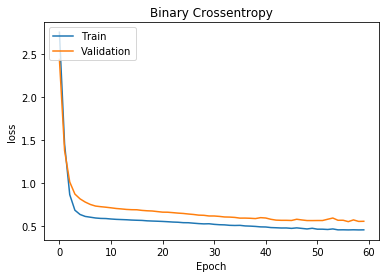

In [8]:
plt.plot(training_history.history["loss"])
plt.plot(training_history.history["val_loss"])
plt.title("Binary Crossentropy")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [9]:
def evaluate_predict(X, y):
    y_pred = model.predict(X)
    y_pred = y_pred > 0.5

    print("Precision: " + str(precision_score(y, y_pred)))
    print("Accuracy: " + str(accuracy_score(y, y_pred)))

In [10]:
print("#### Train ####")
evaluate_predict(X_train, y_train)

#### Train ####
Precision: 0.7543859649122807
Accuracy: 0.7889221556886228


In [11]:
print("#### Validate ####")
evaluate_predict(X_val, y_val)

#### Validate ####
Precision: 0.6463414634146342
Accuracy: 0.726457399103139


In [12]:
df_test = pd.read_csv("test.csv")
clean_data(df_test)
X_test = df_test

In [13]:
y_test = pd.read_csv("gender_submission.csv")

passenger_ids = y_test["PassengerId"].values

y_test.drop("PassengerId", axis=1, inplace=True)

In [14]:
print("#### Test ####")
evaluate_predict(X_test.values, y_test.values)

#### Test ####
Precision: 0.825503355704698
Accuracy: 0.868421052631579


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred > 0.5

survived = []
for p in y_test_pred:
    survived.append(int(p[0]))

prediction = pd.DataFrame({"PassengerId": passenger_ids, "Survived": survived})
prediction.to_csv("prediction.csv", index=False)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
